### Fit the old code to our dataset. 

纸上得来终觉浅，绝知此事要躬行。

In [8]:
files_32 <- read.table("../org.eclipse.jdt.core_3.2/dataset-_3.2-packagelevel.csv", header=T, sep=",")
files_34 <- read.table("../org.eclipse.jdt.core_3.4/dataset-_3.4-packagelevel.csv", header=T, sep=",")
files_35 <- read.table("../org.eclipse.jdt.core_3.5/dataset-_3.5-packagelevel.csv", header=T, sep=",")

nrow(files_32)
nrow(files_34)
nrow(files_35)

[1] 44

[1] 44

[1] 44

### preprocess the dataframe to make it the same as example csv files. 

In [9]:
head(files_32)

plugin,package,NOCU,NOT_total,NOT_max,NOT_avg,NOI_total,NOI_max,NOI_avg,TLOC_total,...,MLOC_max,NBD_max,PAR_max,VG_max,FOUT_max,MLOC_avg,NBD_avg,PAR_avg,VG_avg,FOUT_avg
org.eclipse.jdt.core,org.eclipse.jdt.core,64,20,1,0.3125000,44,1,0.68750000,5949,...,168,7,13,39,30,5.740489,-0.2282609,1.5625000,2.125000,1.1073370
org.eclipse.jdt.core,org.eclipse.jdt.core.compiler,9,6,1,0.6666667,3,1,0.33333333,1984,...,86,4,7,37,10,8.094017,0.2222222,1.7179487,3.743590,0.6153846
org.eclipse.jdt.core,org.eclipse.jdt.core.dom,133,124,1,0.9323308,9,1,0.06766917,27428,...,285,9,9,103,48,8.612487,0.5809114,0.8937926,2.508791,2.3738787
org.eclipse.jdt.core,org.eclipse.jdt.core.dom.rewrite,5,4,1,0.8000000,1,1,0.20000000,1012,...,55,4,6,16,29,9.606383,0.7765957,1.4468085,2.914894,3.4680851
org.eclipse.jdt.core,org.eclipse.jdt.core.eval,3,0,0,0.0000000,3,1,1.00000000,97,...,1,-1,9,1,0,1.000000,-1.0000000,2.1666667,1.000000,0.0000000
org.eclipse.jdt.core,org.eclipse.jdt.core.formatter,4,4,1,1.0000000,0,0,0.00000000,932,...,76,3,6,19,16,18.531250,1.2187500,1.9062500,5.312500,3.5000000


In [10]:
files_32 = cbind(files_32[,1:2], files_32[c("pre", "post")], files_32[,3:32], files_32[,35:44])
files_32 <- na.omit(files_32)

files_34 = cbind(files_34[,1:2], files_34[c("pre", "post")], files_34[,3:32], files_34[,35:44])
files_34 <- na.omit(files_34)

files_35 = cbind(files_35[,1:2], files_35[c("pre", "post")], files_35[,3:32], files_35[,35:44])
files_35 <- na.omit(files_35)

head(files_35)

plugin,package,pre,post,NOCU,NOT_total,NOT_max,NOT_avg,NOI_total,NOI_max,...,MLOC_max,NBD_max,PAR_max,VG_max,FOUT_max,MLOC_avg,NBD_avg,PAR_avg,VG_avg,FOUT_avg
org.eclipse.jdt.core,org.eclipse.jdt.core,90,21,64,20,1,0.3125000,44,1,...,168,7,13,39,30,5.740489,-0.2282609,1.5625000,2.125000,1.1073370
org.eclipse.jdt.core,org.eclipse.jdt.core.compiler,0,0,9,6,1,0.6666667,3,1,...,86,4,7,37,10,8.094017,0.2222222,1.7179487,3.743590,0.6153846
org.eclipse.jdt.core,org.eclipse.jdt.core.dom,66,8,132,123,1,0.9318182,9,1,...,285,9,9,103,48,8.460712,0.5667161,0.8917717,2.487769,2.2435137
org.eclipse.jdt.core,org.eclipse.jdt.core.dom.rewrite,0,0,5,4,1,0.8000000,1,1,...,55,4,6,16,29,9.606383,0.7765957,1.4468085,2.914894,3.4680851
org.eclipse.jdt.core,org.eclipse.jdt.core.eval,0,0,3,0,0,0.0000000,3,1,...,1,-1,9,1,0,1.000000,-1.0000000,2.1666667,1.000000,0.0000000
org.eclipse.jdt.core,org.eclipse.jdt.core.formatter,0,21,4,4,1,1.0000000,0,0,...,76,3,6,19,16,18.531250,1.2187500,1.9062500,5.312500,3.5000000


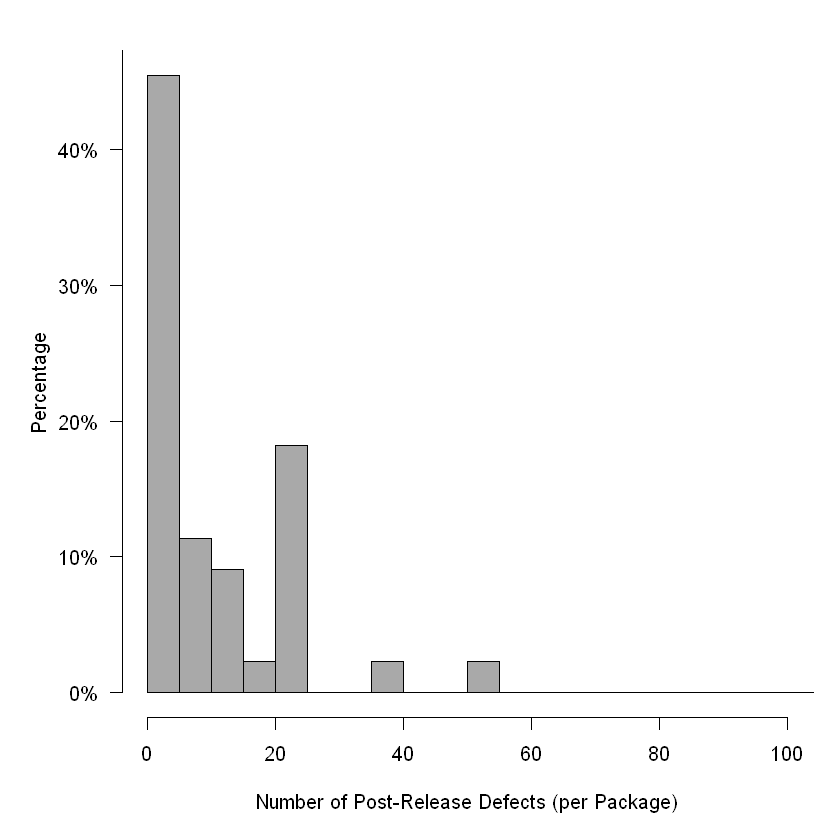

In [11]:
## set the parameter for drawing graphic. 
par(mar=c(5, 5, 2, 1) + 0.1)
## drawing the histogram
hist(files_35$post, freq=T, breaks=100, xlim=c(0,100), axes=F, main="", xlab="Number of Post-Release Defects (per Package)", ylab="Percentage", col="darkgray")
axis(1)

## this line, can draw the 0, 10%, 20% etc.. E.g., the 66.1 means the 661 (total number of lines) / 100 * 10. 
## the first param is: 2 means y axis. 1 means x. 
## 
axis(2, at=c(0, 4.4, 4.4*2, 4.4*3, 4.4*4, 4.4*5, 4.4*6), labels=c("0%","10%","20%","30%","40%","50%","60%"), las=1)

In [12]:
# col_name <- names(files_32)
# env_vars <- col_name
# for (env in env_vars){
#    print(paste(env, "+"))
# }
# env_vars

[1] "plugin +"
[1] "package +"
[1] "pre +"
[1] "post +"
[1] "NOCU +"
[1] "NOT_total +"
[1] "NOT_max +"
[1] "NOT_avg +"
[1] "NOI_total +"
[1] "NOI_max +"
[1] "NOI_avg +"
[1] "TLOC_total +"
[1] "TLOC_max +"
[1] "TLOC_avg +"
[1] "ACD_total +"
[1] "ACD_max +"
[1] "ACD_avg +"
[1] "NSM_total +"
[1] "NSM_max +"
[1] "NSM_avg +"
[1] "NSF_total +"
[1] "NSF_max +"
[1] "NSF_avg +"
[1] "NOM_total +"
[1] "NOM_max +"
[1] "NOM_avg +"
[1] "NOF_total +"
[1] "NOF_max +"
[1] "NOF_avg +"
[1] "MLOC_total +"
[1] "NBD_total +"
[1] "PAR_total +"
[1] "VG_total +"
[1] "FOUT_total +"
[1] "MLOC_max +"
[1] "NBD_max +"
[1] "PAR_max +"
[1] "VG_max +"
[1] "FOUT_max +"
[1] "MLOC_avg +"
[1] "NBD_avg +"
[1] "PAR_avg +"
[1] "VG_avg +"
[1] "FOUT_avg +"


[1] "plugin"     "package"    "pre"        "post"       "NOCU"      
 [6] "NOT_total"  "NOT_max"    "NOT_avg"    "NOI_total"  "NOI_max"   
[11] "NOI_avg"    "TLOC_total" "TLOC_max"   "TLOC_avg"   "ACD_total" 
[16] "ACD_max"    "ACD_avg"    "NSM_total"  "NSM_max"    "NSM_avg"   
[21] "NSF_total"  "NSF_max"    "NSF_avg"    "NOM_total"  "NOM_max"   
[26] "NOM_avg"    "NOF_total"  "NOF_max"    "NOF_avg"    "MLOC_total"
[31] "NBD_total"  "PAR_total"  "VG_total"   "FOUT_total" "MLOC_max"  
[36] "NBD_max"    "PAR_max"    "VG_max"     "FOUT_max"   "MLOC_avg"  
[41] "NBD_avg"    "PAR_avg"    "VG_avg"     "FOUT_avg"

In [7]:
## till now 2019年10月12日 there are only 22 columns in files. 21 of them are useful (the useless one is line ID)
pre.p <- rep (-1, 42)
post.p <- rep (-1, 42)
for (i in 3:44) {
    pre.p[i-1] <- cor.test(files_35[,i], files_35$pre, method="spearman", exact=FALSE)$p.value
    post.p[i-1] <- cor.test(files_35[,i], files_35$post, method="spearman", exact=FALSE)$p.value
}

# p.value is the significance. If the significance is not enough (p is not small enough), the correlation results may not hold. 
cbind(
    cor(files_35[,3:44], files_35$pre, method="spearman"),
    (pre.p<0.01),
    cor(files_35[,3:44], files_35$post, method="spearman"), 
    (post.p<0.01)
)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message in cbind(cor(files_35[, 3:44], files_35$pre, method = "spearman"), :
"number of rows of result is not a multiple of vector length (arg 2)"

pre,1.00000000,1,0.60276552,1
post,0.60276552,1,1.00000000,1
NOCU,0.70428084,1,0.40081499,1
NOT_total,0.79152229,1,0.50605011,1
NOT_max,0.17810053,1,0.15677560,1
NOT_avg,-0.01772520,0,0.14731047,0
NOI_total,0.26368713,0,-0.01236596,0
NOI_max,0.28384036,0,0.01380149,0
NOI_avg,0.01772520,0,-0.14731047,0
TLOC_total,0.77677777,0,0.58761204,0
TLOC_max,0.58440328,1,0.49465687,1


As we can see, there are some metrics have correlations that are above 0.400 threshold. 

Like `NOT, NOCU, TLOC, ACD, NSM, method level metrics`. 

Especially in `Method level`, " However, in many cases the maximum metrics (_max) show correlation values comparable to the accumulated ones (except for PAR_max)."

<table>
<tbody>
	<tr><th scope=row>pre</th><td> 1.00000000</td><td>1          </td><td> **0.60276552**</td><td>1          </td></tr>
	<tr><th scope=row>post</th><td> **0.60276552**</td><td>1          </td><td> 1.00000000</td><td>1          </td></tr>
	<tr><th scope=row>NOCU</th><td> **0.70428084**</td><td>1          </td><td> **0.40081499**</td><td>1          </td></tr>
	<tr><th scope=row>NOT_total</th><td> **0.79152229**</td><td>1          </td><td> **0.50605011**</td><td>1          </td></tr>
	<tr><th scope=row>NOT_max</th><td> 0.17810053</td><td>1          </td><td> 0.15677560</td><td>1          </td></tr>
	<tr><th scope=row>NOT_avg</th><td>-0.01772520</td><td>0          </td><td> 0.14731047</td><td>0          </td></tr>
	<tr><th scope=row>NOI_total</th><td> 0.26368713</td><td>0          </td><td>-0.01236596</td><td>0          </td></tr>
	<tr><th scope=row>NOI_max</th><td> 0.28384036</td><td>0          </td><td> 0.01380149</td><td>0          </td></tr>
	<tr><th scope=row>NOI_avg</th><td> 0.01772520</td><td>0          </td><td>-0.14731047</td><td>0          </td></tr>
	<tr><th scope=row>TLOC_total</th><td> 0.77677777</td><td>0          </td><td> 0.58761204</td><td>0          </td></tr>
	<tr><th scope=row>TLOC_max</th><td> **0.58440328**</td><td>1          </td><td> **0.49465687**</td><td>1          </td></tr>
	<tr><th scope=row>TLOC_avg</th><td> 0.24650459</td><td>1          </td><td> 0.38219806</td><td>1          </td></tr>
	<tr><th scope=row>ACD_total</th><td> 0.57885672</td><td>0          </td><td> 0.48249529</td><td>0          </td></tr>
	<tr><th scope=row>ACD_max</th><td> **0.55113606**</td><td>1          </td><td> **0.47401980**</td><td>1          </td></tr>
	<tr><th scope=row>ACD_avg</th><td> **0.42412024**</td><td>1          </td><td> 0.35679961</td><td>1          </td></tr>
	<tr><th scope=row>NSM_total</th><td> 0.38768640</td><td>1          </td><td> 0.50997170</td><td>0          </td></tr>
	<tr><th scope=row>NSM_max</th><td> 0.31597620</td><td>1          </td><td>** 0.44420862**</td><td>1          </td></tr>
	<tr><th scope=row>NSM_avg</th><td> 0.07686697</td><td>0          </td><td> 0.30854197</td><td>1          </td></tr>
	<tr><th scope=row>NSF_total</th><td> 0.49005786</td><td>0          </td><td> 0.35649326</td><td>0          </td></tr>
	<tr><th scope=row>NSF_max</th><td> 0.37830710</td><td>1          </td><td> 0.25159810</td><td>0          </td></tr>
	<tr><th scope=row>NSF_avg</th><td> 0.05522099</td><td>0          </td><td> 0.08656733</td><td>0          </td></tr>
	<tr><th scope=row>NOM_total</th><td> 0.71207738</td><td>0          </td><td> 0.47347713</td><td>0          </td></tr>
	<tr><th scope=row>NOM_max</th><td> 0.48981143</td><td>1          </td><td> 0.39228596</td><td>1          </td></tr>
	<tr><th scope=row>NOM_avg</th><td> 0.25321671</td><td>1          </td><td> 0.22010467</td><td>1          </td></tr>
	<tr><th scope=row>NOF_total</th><td> 0.53838378</td><td>0          </td><td> 0.47198494</td><td>0          </td></tr>
	<tr><th scope=row>NOF_max</th><td> 0.30456903</td><td>1          </td><td> 0.33279354</td><td>1          </td></tr>
	<tr><th scope=row>NOF_avg</th><td>-0.01629178</td><td>0          </td><td> 0.17599930</td><td>0          </td></tr>
	<tr><th scope=row>MLOC_total</th><td> 0.80063537</td><td>0          </td><td> 0.59519270</td><td>0          </td></tr>
	<tr><th scope=row>NBD_total</th><td> **0.66227017**</td><td>1          </td><td> **0.53868788**</td><td>1          </td></tr>
	<tr><th scope=row>PAR_total</th><td> **0.68749814**</td><td>1          </td><td> **0.52989253**</td><td>1          </td></tr>
	<tr><th scope=row>VG_total</th><td> **0.77781426**</td><td>1          </td><td> **0.56982123**</td><td>1          </td></tr>
	<tr><th scope=row>FOUT_total</th><td> **0.75950596**</td><td>1          </td><td> **0.61744127**</td><td>1          </td></tr>
	<tr><th scope=row>MLOC_max</th><td> **0.58043902**</td><td>1          </td><td> **0.51644209**</td><td>1          </td></tr>
	<tr><th scope=row>NBD_max</th><td> **0.67429189**</td><td>1          </td><td> **0.54935675**</td><td>1          </td></tr>
	<tr><th scope=row>PAR_max</th><td> **0.49668204**</td><td>1          </td><td> **0.42127876**</td><td>1          </td></tr>
	<tr><th scope=row>VG_max</th><td> **0.55831789**</td><td>1          </td><td> **0.48964758**</td><td>1          </td></tr>
	<tr><th scope=row>FOUT_max</th><td> **0.65558626**</td><td>1          </td><td> **0.54146028**</td><td>1          </td></tr>
	<tr><th scope=row>MLOC_avg</th><td> **0.19590628**</td><td>1          </td><td> 0.32434948</td><td>1          </td></tr>
	<tr><th scope=row>NBD_avg</th><td> 0.11885558</td><td>0          </td><td> 0.30896735</td><td>0          </td></tr>
	<tr><th scope=row>PAR_avg</th><td>-0.06609494</td><td>0          </td><td> 0.12975451</td><td>0          </td></tr>
	<tr><th scope=row>VG_avg</th><td> 0.21140291</td><td>0          </td><td> 0.32177352</td><td>0          </td></tr>
	<tr><th scope=row>FOUT_avg</th><td> 0.23404345</td><td>0          </td><td> 0.38077630</td><td>0          </td></tr>
</tbody>
</table>

In [13]:
test_classification_pkg <- function (train, test) 
{
    model.glm <- glm((post>0) ~ 
                        pre +
                        NOCU +
                        NOT_total +
                        NOT_max +
                        NOT_avg +
                        NOI_total +
                        NOI_max +
                        NOI_avg +
                        TLOC_total +
                        TLOC_max +
                        TLOC_avg +
                        ACD_total +
                        ACD_max +
                        ACD_avg +
                        NSM_total +
                        NSM_max +
                        NSM_avg +
                        NSF_total +
                        NSF_max +
                        NSF_avg +
                        NOM_total +
                        NOM_max +
                        NOM_avg +
                        NOF_total +
                        NOF_max +
                        NOF_avg +
                        MLOC_total +
                        NBD_total +
                        PAR_total +
                        VG_total +
                        FOUT_total +
                        MLOC_max +
                        NBD_max +
                        PAR_max +
                        VG_max +
                        FOUT_max +
                        MLOC_avg +
                        NBD_avg +
                        PAR_avg +
                        VG_avg +
                        FOUT_avg
                     
                     , data=train, family = "binomial")
    test.prob <- predict(model.glm, test, type="response")
    test.pred <- test.prob>=0.50

    outcome <- table(factor(test$post>0, levels=c(F,T)), factor(test.pred, levels=c(F,T)))
    TN <- outcome[1,1]
    FN <- outcome[2,1]
    FP <- outcome[1,2]
    TP <- outcome[2,2]
    precision <- if (TP + FP ==0) { 1 } else { TP / (TP + FP) }
    recall <- TP / (TP + FN)
    accuracy <- (TP + TN) / (TN + FN + FP + TP)
    defects <- (TP + FN) / (TN + FN + FP + TP)
    return (c(defects, precision, recall, accuracy))
}

test_classification_pkg(files_32, files_32)
test_classification_pkg(files_32, files_34)
test_classification_pkg(files_32, files_35)

test_classification_pkg(files_34, files_32)
test_classification_pkg(files_34, files_34)
test_classification_pkg(files_34, files_35)

test_classification_pkg(files_35, files_32)
test_classification_pkg(files_35, files_34)
test_classification_pkg(files_35, files_35)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

[1] 0.5454545 1.0000000 1.0000000 1.0000000

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

[1] 0.6136364 0.6666667 0.2222222 0.4545455

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

[1] 0.5681818 0.7894737 0.6000000 0.6818182

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

[1] 0.5454545 0.7200000 0.7500000 0.7045455

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

[1] 0.6136364 1.0000000 1.0000000 1.0000000

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

[1] 0.5681818 0.7777778 0.8400000 0.7727273

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

[1] 0.5454545 0.7083333 0.7083333 0.6818182

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

[1] 0.6136364 0.7777778 0.5185185 0.6136364

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

[1] 0.5681818 1.0000000 1.0000000 1.0000000

Prrecision increased, but accuracy decreased.

Defect higher. 

"However, the recall increases substantially. "

Recall is low. Which means there are still a lot of the buggy file are not identified.

But the precision are generally higher than `0.6`, it means when this model say "this file is defect-prone", this decision is most likely to be true. 

In [14]:
## need to understand how to interprete the r^2, pearson, spearman, and their p.value. 
test_ranking_pkg <- function (train, test) 
{
    model.lm <- lm(post ~ 
                   
                        pre +
                        NOCU +
                        NOT_total +
                        NOT_max +
                        NOT_avg +
                        NOI_total +
                        NOI_max +
                        NOI_avg +
                        TLOC_total +
                        TLOC_max +
                        TLOC_avg +
                        ACD_total +
                        ACD_max +
                        ACD_avg +
                        NSM_total +
                        NSM_max +
                        NSM_avg +
                        NSF_total +
                        NSF_max +
                        NSF_avg +
                        NOM_total +
                        NOM_max +
                        NOM_avg +
                        NOF_total +
                        NOF_max +
                        NOF_avg +
                        MLOC_total +
                        NBD_total +
                        PAR_total +
                        VG_total +
                        FOUT_total +
                        MLOC_max +
                        NBD_max +
                        PAR_max +
                        VG_max +
                        FOUT_max +
                        MLOC_avg +
                        NBD_avg +
                        PAR_avg +
                        VG_avg +
                        FOUT_avg
                   
                   , data=train)
    test.pred <- predict(model.lm, test)

    r.squared <- summary(model.lm)$r.squared
    pearson <- cor(test$post, test.pred, method="pearson")
    spearman <- cor(test$post, test.pred, method="spearman")
    pearson.p <- cor.test(test$post, test.pred, method="pearson")$p.value
    spearman.p <- cor.test(test$post, test.pred, method="spearman", exact=FALSE)$p.value

    return (c(r.squared, pearson, spearman, pearson.p<0.01, spearman.p<0.01))
}

test_ranking_pkg(files_32, files_32)
test_ranking_pkg(files_32, files_34)
test_ranking_pkg(files_32, files_35)

test_ranking_pkg(files_34, files_32)
test_ranking_pkg(files_34, files_34)
test_ranking_pkg(files_34, files_35)

test_ranking_pkg(files_35, files_32)
test_ranking_pkg(files_35, files_34)
test_ranking_pkg(files_35, files_35)

Warning message in predict.lm(model.lm, test):
"prediction from a rank-deficient fit may be misleading"

[1] 0.9901556 0.9950656 0.9271367 1.0000000 1.0000000

Warning message in predict.lm(model.lm, test):
"prediction from a rank-deficient fit may be misleading"

[1] 0.9901556 0.8480321 0.6400025 1.0000000 1.0000000

Warning message in predict.lm(model.lm, test):
"prediction from a rank-deficient fit may be misleading"

[1] 0.9901556 0.8817002 0.4686029 1.0000000 1.0000000

Warning message in predict.lm(model.lm, test):
"prediction from a rank-deficient fit may be misleading"

[1] 0.9873434 0.6583925 0.4910070 1.0000000 1.0000000

Warning message in predict.lm(model.lm, test):
"prediction from a rank-deficient fit may be misleading"

[1] 0.9873434 0.9936516 0.8448178 1.0000000 1.0000000

Warning message in predict.lm(model.lm, test):
"prediction from a rank-deficient fit may be misleading"

[1] 0.9873434 0.8729967 0.6148436 1.0000000 1.0000000

Warning message in predict.lm(model.lm, test):
"prediction from a rank-deficient fit may be misleading"

[1] 0.9871633 0.7777857 0.4247988 1.0000000 1.0000000

Warning message in predict.lm(model.lm, test):
"prediction from a rank-deficient fit may be misleading"

[1] 0.9871633 0.9054927 0.5301529 1.0000000 1.0000000

Warning message in predict.lm(model.lm, test):
"prediction from a rank-deficient fit may be misleading"

[1] 0.9871633 0.9935609 0.8093649 1.0000000 1.0000000

According to r.square, around `99%` "of variance are explained by complexity metrics".

Except for training and predicting on it self, the spearman correlation value ρ are various, some are as high as `0.640`, some are as low as `0.425`. And they are also positive. 

"Also, models learned from earlier releases can be used to predict for future releases; for instance the model trained from release `3.2` showed a correlation of `0.640` on release `3.4`". 

"Again the increase in correlation and R2 values demonstrates that it is easier to make predictions for packages than for files."